# Optimització - Descens del gradient

L’optimització matemàtica o la programació matemàtica és la selecció d’un millor element a partir d’un conjunt d’alternatives disponibles. Problemes d’optimització de tipus sorgeixen en totes les disciplines quantitatives, des de la informàtica i l’enginyeria fins a la investigació d’operacions i l’economia, i el desenvolupament de mètodes de solució ha estat d’interès en les matemàtiques durant segles.

En el cas més senzill, un problema d’optimització consisteix a maximitzar o minimitzar una funció real mitjançant l’elecció sistemàtica dels valors d’entrada dins d’un conjunt permès i el càlcul del valor de la funció. 
La generalització de la teoria i tècniques d’optimització a altres formulacions constitueix una àmplia àrea de matemàtiques aplicades. 
Més generalment, l’optimització inclou trobar valors "els millors disponibles" d'alguna funció objectiva donat un domini (o entrada) definits, incloent una varietat de diferents tipus de funcions objectives i diferents tipus de dominis.


Es pot representar un problema d'optimització de la següent manera:

- Tenint en compte: una funció $f : A \to \mathbb{R}$ des d'algun conjunt $A$ als nombres reals.
- Buscat: un element ${x}_0 \in A$ tal que $f({x}_{0}) \leq f({x})$ per a tots els ${x} \in A$ ("minimització") o tal que $f({x}_{0}) \geq f({x})$  per a tots els ${x} \in A$ ("maximització").

La metodologia crítica per resoldre problemes d'optimització és el **descens del gradient**.

**Prior:**
S'anomena *derivada parcial* d'una funció de diverses variables a la seva derivada respecte a una d'aquestes variables, deixant les altres constants. Cada derivada indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

El *gradient* de la funció $f(x_1, \cdots, x_n)$ és un vector format per les derivades parcials de la funció. 
Aquest dóna la direcció en la qual la funció creix més ràpidament. 

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

## 1. Cas Unidimensionals

Suposem que volem calcular el nimim numèric de la següent funció unidimensional:

$$ f_1(x) = x^2 $$

La derivada parcial de la funcio $f$ és:

$$ \frac{\partial f_1}{\partial x} = 2 x$$

El primer pas que farem és visualitzar la funció i veure el comportament del gradient / derivada sobre un conjunt de punts que pertanyen el domini de la funció.

In [1]:
from plot_utils import *

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def f1(x):
    return x**2

def df1(x):
    return 2*x

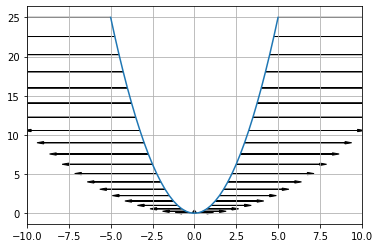

In [3]:
# Function to plot
X = np.arange(-5, 5.01, 0.25)
fig = plt.figure()
plot_1d(X, f1(X), fig)
plot_gradient(X, f1(X), df1(X), fig=fig)
fig.gca().set_xlim(-10, 10)
plt.show()

Per tant, una possible estratègia per maximitzar (*minimitzar*) la funció és reptir la següent estratègia:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient.
3. Fer un petit pas en la direcció (*contraria*) del vector gradient: $x^{k+1} = x^{k}-\alpha^{k} \nabla f(x^{k})$
4. Repetir des de 2

La cerca s'acabaria quan el vector gradient és zero, que vol dir que hem trobat un màxim (*mínim*). Donat que la presició flotant potser evita que arribem mai a aquest nombre, afegim dos mètodes més per acabar la cerca:

1. Si el moviment que realitzem és més petit que un epsilon ($|x^{k+1} - x^{k}| < eps$)
2. Si realitzem més de `max_iters` iteracions

Si la funció és **unimodal** (conté un únic màxim (*mínim*)), hem trobat una la nostra solució. 
Sinó, pot ser que estem en un màxim (*mínim*) local i que sigui una solució no satisfactòria.

**Implementa la funció *gradient_descend_1d* seguint el procediment proposat. Durant el procés d'optimització visualitza els punts de la gràfica per on vagis passant.**

 > Recordeu que els ordinadors generen un error numèric, per tant no heu d'igualar mai a zero, heu de fer servir una tolerància.
Definiu també un nombre màxim d'iteracions que l'algorisme pot realitzar per arribar al punt desitjat.

In [4]:
def gradient_descend_1d(grad, x, alpha, eps=1e-3, max_iters=1e2):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, el gradient i el pas, intenta trobar el mínim
    de la funció seguint el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_epochs: Iteracions màximes a realitzar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Una np.array [2] amb els punts del recorregut
    """

    '''
    Per limitar el nombre d'iteracions utilitzarem un for que faci
    "max_iters" passos. En cada iteració es calcula el nou punt
    d'exploració a partir de l'anterior (els guardem en una llista
    per després fer el plot) i comprovem que hi ha hagut una variació
    suficient respecte epsilon. Acabem retornant l'array de punts i
    l'últim d'aquests, que indica el mínim trobat. Tot i que en el
    paràmetre de retorn diu una llista, per l'execució en la següent
    cel·la hem interpetat que el 2n paràmetre ha de ser el mínim.
    '''

    points = [x]
    for _ in range(int(max_iters)):
        points.append(points[-1] - alpha * grad(points[-1]))
        if abs(points[-1] - points[-2]) < eps:
            break
    return np.array(points), points[-1]

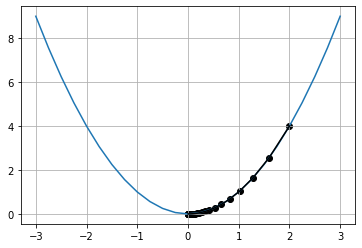

In [5]:
X = np.arange(-3, 3.01, 0.25)
points, minimum = gradient_descend_1d(df1, 2, .1)

fig = plt.figure()
plot_gradient_descend_1d(f1, X, points, minimum, fig)
plt.show()

Però... són totes els funcions unimodals? Obviament no.

Podem tenir funcions que contenen un màxim i un mínim. Per veure com es comporten aquestes funcions **repeteix el procediment anterior amb aquesta nova funció**.

$$f_2(x) = x^3 - 2x + 2$$

$$ \frac{\partial f_2}{\partial x} = 3x^2 -2 x$$

In [6]:
def f2 (x):
    return x**3 - 2*x + 2

def df2(x):
    return 3*x**2 - 2

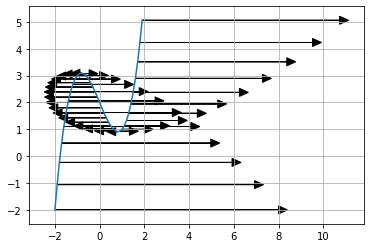

In [7]:
X = np.arange(-2, 2, 0.1)
fig = plt.figure()
plot_1d(X, f2(X), fig)
plot_gradient(X, f2(X), df2(X), fig=fig)

**Començant en el punt $x=0.75$, és possible arribar a valors de $x < -1$ en 10 o menys iteracions? Fer proves demostrant que es pot, o no, arribar-hi.**

**Justifica el comportament del procés d'optimització**

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

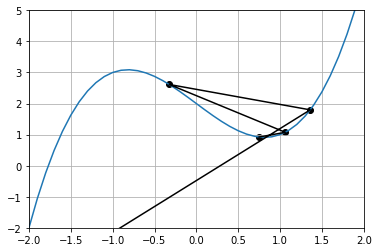

In [8]:
'''
Sí que és possible si el valor de la multiplicació del pas (alpha) per la derivada és
suficientment gran com per a que en una iteració ens allunyem de la vicinitat del mínim
i arribem en un altre zona de la funció, on el mínim d'aquesta zona està en una altra
direcció. En aquest cas la zona és x < -1, on la funció és creixent i per tant si arriba
aquí el gradient descent anirà infinitament cap al -infinit.

Bàsciaament si fem un pas molt gran, ja sigui perquè o bé el alpha o bé la derivada en
aquell punt és molt gran, podem sortir de la zona d'un mínim i anar a parar a una altra.

Veiem a continuació com amb alpha=1 podem arribar a x < -1 en 5 iteracions:
'''

X = np.arange(-20, 20, 0.1)
x0 = 0.75
points, minimum = gradient_descend_1d(df2, x0, 1, max_iters=10)

fig = plt.figure()
plot_gradient_descend_1d(f2, X, points, minimum, fig)
fig.gca().set_ylim([-2, 5])
fig.gca().set_xlim([-2, 2])
plt.show()

#### Podem assegurar que sempre arribem a un minim?

Suposa ara la funció
$$
f_{2.2}(x) = \frac{x}{1+x^2}
$$
amb gradient
$$ \frac{\partial f_{2.2}}{\partial x} = \frac{1-x^2}{(1+x^2)^2}
$$

In [9]:
def f2_2(x):
    return x / (1 + x**2)

def df2_2(x):
    return (1 - x**2) / (1 + x**2)**2

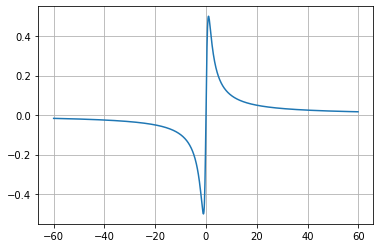

In [10]:
X = np.arange(-60, 60, 0.1)
fig = plt.figure()
plot_1d(X, f2_2(X), fig)

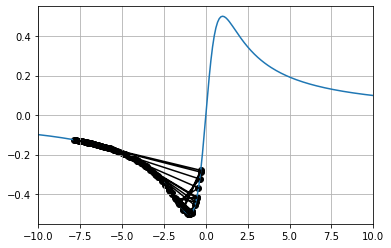

In [89]:
x0 = (np.random.random() - 0.5) * 10
points, minimum = gradient_descend_1d(df2_2, x0, 10)

fig = plt.figure()
plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
fig.gca().set_xlim([-10, 10])
plt.show()

**Justifica el comportament per diferent punts d'inici. Podem arribar sempre al mínim?**

En general pot ser que ni tan sols existeix cap mínim. També es pot donar el cas que estiguem a prop d'un mínim local i convergim a aquest, i mai ni tan sols s'acosti al mínim global o a un mínim més petit.

Suposem ara que existeix un mínim i que estem en la funció anterior. Tampoc necessàriament arribarem. Si estem a la dreta del màxim, el Gradient Descent anirà movent cap a l'esquerra perquè és la direcció cap on hi podria haver un mínim local, però mai arribarà a res. Si està per l'esquerra en principi sí que hauria d'arribar, però hi pot haver també altres problemes.

Un d'ells és que si està gaire a l'esquerra, com el pendent de la funció és molt baix a penes es mourà. Per tant amb un pas de alfa fix tardaria un nº molt elevat de passos per arribar a la solució, i si el tallem en un nº fix d'iteracions pot ser que encara no hagi arribat al mínimm.

Una altra cosa que podria passar és que si l'alfa no és gaire petita o la derivada prop del mínim augmenta en valor absolut ràpidament, pot ser que mai acabai de convergi amb precisió, ja que pot oscil·lar d'una banda del mínim a l'altra constantment sense anar millorant ni aproximar-se a la solució, però d'aquesta manera almenys en acabar les iteracions tindríem un resultat lleugerament proper al mínim, tot i que hauríem perdut el temps fent iteracions bastant inútils.

Aquests 2 últims problemes es podrien solucionar si tinguéssim en compte que el valor de derivada * alpha no fos ni molt gran ni molt petit, i de fet ho farem en els propers exercicis.

## Cas N-dimensionals

Podem aplicar el procediment anterior quan tenim funcions dos-dimensionals? La resposta és que sí. 

L'unic canvi en el procediment és que ara caldrà avançar en dues direccions.

Sigui la funció 2-dimensional $f_3$:
$$ f_3(x_1, x_2) = x_1^2 + x_2^2$$

i el seu gradient:

$$\nabla {f_3(x_1, x_2)} = 
\left( \frac{\partial f_3}{\partial x_1}, \frac{\partial f_3}{\partial x_2}\right) = 
\left( 2 x_1, 2 x_2 \right)$$

Visualitza la forma de grafica i el comportament del seu gradient.

In [90]:
def f3 ( x, y ):
    return x**2 + y**2

def grad_f3(x, y):
    return np.asarray((2 * x, 2 * y))

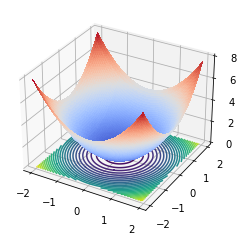

In [91]:
# Surface to plot
fig = plt.figure()
X, Y, Z = generate_grid(f3)
plot_2d(X, Y, Z, fig)

Per veure millor el gradient en aquest cas, podem imprimir el seu comportament en un pla.

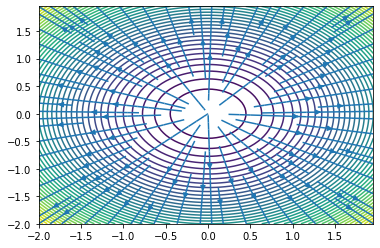

In [92]:
fig = plt.figure()
project_gradient(f3, grad_f3, fig)

Implamenteu l'algorisme anterior amb el cas 2-dimensional.

Recordeu amb amb la llibreria numpy podeu sumar o restar vectors, multiplicar per un escalar, etc.

In [93]:
def gradient_descend_2d(gradient, x, alpha=0.1, eps=1e-6, max_iter=1000, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    """

    '''
    Repetim el mateix procés que en el cas d'una dimensió
    però ara utilitzem un vector en comptes d'un punt per
    calcular el gradient i utilitzem la norma euclidiana
    per comprovar la distància respecta a l'anterior iteració.
    '''
    points = [x]
    for _ in range(max_iter):
        # Fem servir l'operador * per desdoblar el vector en dues variables
        # perquè la funció gradient espera dues variables
        points.append(points[-1] - alpha * gradient(*points[-1]))
        if np.linalg.norm(points[-1] - points[-2]) < eps:
            break
    if verbose:
        print(len(points) - 1)
    return np.array(points), points[-1]

In [94]:
x0 = np.asarray([1, 1])
points, minimum = gradient_descend_2d(grad_f3, x0)

58


Minimum:  [0. 0.]


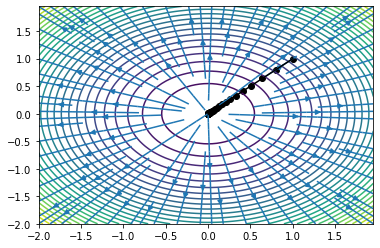

In [95]:
print ("Minimum: ", np.round(minimum,3))

fig = plt.figure()
X, Y, _ = generate_grid(f3)
plot_gradient_descend_2d(f3, grad_f3, X, Y, points, minimum, fig)

Considera ara la funció
$$f_4(x_1, x_2) = 100(x_1^2 + x_2^2)$$

amb gradient

$$\nabla {f_4(x_1, x_2)} = 
\left( \frac{\partial f_4}{\partial x_1}, \frac{\partial f_4}{\partial x_2}\right) = 
\left( 200 x_1, 200 x_2 \right)$$

En aquest cas, igual que en molts altres, és més útil utilizar el gradient normalizat per aplicar l'algorisme. 

**Fent servir `gradient_descend_2d`, podeu trobar el mínim de les funcions $f_3$ i $f_4$ amb el següents paràmetres:**

* $\alpha$ igual en les dues crides, es pot modificar
* $x=(1, 1)$ en les dues crides
* `max_iter=100` en les dues crides
* `eps=1e-6` en les dues crides

**Justifica perque són capaços, o no, de trobar el mínim amb aquest paràmetres. Quines dificultats presenta?**

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

In [96]:
def f4(x, y):
    return 100 * (x**2 + y**2)

def grad_f4(x, y):
    return np.asarray((200 * x, 200 * y))

In [97]:
x0 = np.asarray((1, 1))
alpha = 0.01
points_f3, minimum_f3 = gradient_descend_2d(grad_f3, x0, alpha=alpha, max_iter=100, eps=1e-6)
points_f4, minimum_f4 = gradient_descend_2d(grad_f4, x0, alpha=alpha, max_iter=100, eps=1e-6)

100
100


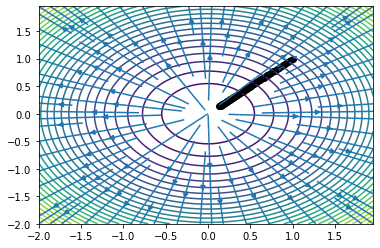

In [98]:
'''
A diferència del no normalitzat, utilitzar el vector gradient normalitzat amb l'alpha
de valor tant petit proveïda sí que podem arribar al mínim (tot i que a un ritme re-
lativament lent). Tal i com en el cas uni dimensional, però, escollir un valor d'alpha
massa gran ens podria treure del camí al mínim local que volem buscar i podriem no arribar-hi
mai. L'elecció d'una alpha és, per tant,  una de les dificultats d'aquest mètode. El càlcul del
gradient també pot ser una de les dificultats, depent de la complexitat de la derivació
de la funció donada.
'''

fig = plt.figure()
X, Y, _ = generate_grid(f3)
plot_gradient_descend_2d(f3, grad_f3, X, Y, points_f3, minimum_f3, fig)
#print(minimum_f3)
plt.show()

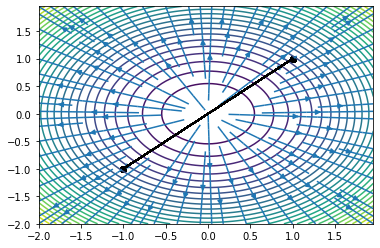

In [99]:
'''
En aquest cas, corresponent al no normalitzat, no som
capaços de trobar el mínim perquè amb l'alpha que hem
utilitzat el primer pas ens porta al punt (-1, 1), però
com el comportament és simètric (l'anterior punt era
(1, 1)) el següent pas ens torna al punt del que veniem,
entrant en un bucle. Això és un problema degut al comportament
de la funció i la alpha escollida. Escollir valors adequats
de alpha i normalitzar la funció és precís per a tenir
més possibilitats de trobar el mínim. També seria millor
utilitzar una mica d'estocasticat per no quedar-nos en 
un cicle fix, cosa que en general és bastant improbable
però que an aquest exemple just passa.
'''

fig = plt.figure()
X, Y, _ = generate_grid(f4)
plot_gradient_descend_2d(f4, grad_f4, X, Y, points_f4, minimum_f4, fig)
#print(minimum_f4)
plt.show()

## Temps de convergència

Observa ara la següent funció, anomenada funció de **Rosenbrock**.

$$ f(x_1, x_2) = (a - x_1)^2 + b (x_2 - x_1^2)^2$$

**El mínim d'aquesta funció es troba al punt: $(x_1, x_2) = (a, a^{2})$.**

In [100]:
A_ROS = 1

def f_ros(x, y, a=A_ROS, b=10):
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y, a=A_ROS, b=10):
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

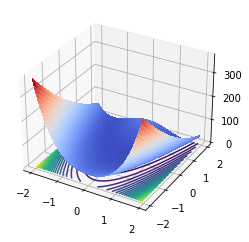

In [101]:
# Surface to plot
fig = plt.figure()
X, Y, Z = generate_grid(f_ros)
plot_2d(X, Y, Z, fig)

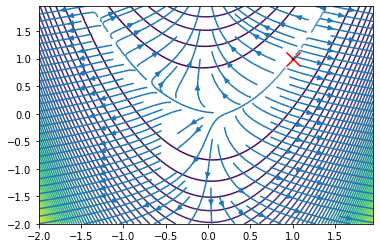

In [102]:
fig = plt.figure()
project_gradient(f_ros, grad_f_ros, fig)
plt.scatter(A_ROS, A_ROS**2, marker='x', color='r', s=200)
plt.show()

Aquesta funció té un mínim molt pla, la pendent és pràcticament nula al sel voltat, pel que els mètodes iteratius tarden molt a trobar el mínim

2109
[0.99988876 0.99977307]


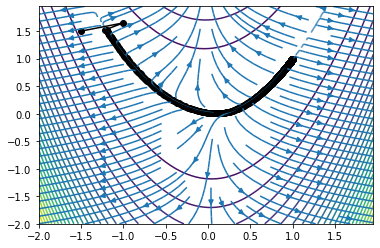

In [103]:
fig = plt.figure()
x0 = np.asarray((-1.5, 1.5))
points, minimum = gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

### Trobant el pas òptim

Una possibilitat per fer menys iteracions i accelerar la convergència és trobant el valor de $\alpha$ automàticament a cada pas, és a dir aquella $\alpha$ que fa mínim el valor de $f$.

L'algorisme és tal que:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient
3. $\alpha = 10$
4. Calcular $x^{k+1} = x^{k}-\alpha \nabla f(x^{k})$
5. Si $f(x^{k+1}) > f(x^{k})$, $\alpha = \alpha / 2$, descartar $x^{k+1}$ i tornar al pas 4
6. En cas contrari, moure's a $x^{k+1}$ i repetir des de 2

In [117]:
def gradient_descend_2d_auto(f, gradient, x, eps=1e-6, max_iter=1000, initial_alpha=10, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param f: Funció a minimitzar
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param initial_alpha: Pas inicial a cada iteració, corresponent al punt 3 anterior
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * Una np.array [2] amb el punts dels recoregut
    """

    '''
    Com bé se'ns demana, utilitzarem el mateix codi que en la implementació, però a cada
    iteració comprovem si hem progressat en la cerca del mínim, i, si no és així, eliminarem
    l'element que hem afegit a la llista i passarem a una nova iteració utilitzant una alpha
    reduïda (a la meitat). Encara que no afegim el punt a la llista perquè fa augmentar la f
    igualement considerarem que hi ha hagut una iteració, ja que hem fet un pas i hem perdut
    el temps per a fer-lo, si no ho considerem així, el nombre d'iteracions no serà el mateix
    i evidentment no podrem comparar els resultats.
    '''
    points = [x]
    alpha = initial_alpha
    for _ in range(max_iter):
        points.append(points[-1] - alpha * gradient(*points[-1]))
        if f(*points[-1]) > f(*points[-2]):
            alpha /= 2
            points.pop()
            continue
        alpha = initial_alpha # Si baixa la f, tornem a la alpha inicial segons el pseudocodi
        if np.linalg.norm(points[-1] - points[-2]) < eps:
            break
    if verbose:
        print(len(points) - 1)
    print(len(points))
    return np.array(points), points[-1]

1002
[0.99996455 0.99992681]


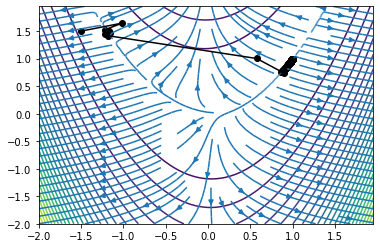

In [105]:
fig = plt.figure()
x0 = np.asarray((-1.5, 1.5))
points, minimum = gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000)
X, Y, _ = generate_grid(f_ros)
plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
print(minimum)

In [106]:
%timeit gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000, verbose=False)

25.2 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [116]:
%timeit gradient_descend_2d_auto(f_ros, grad_f_ros, x0, initial_alpha=0.1, max_iter=10000, verbose=False)

25 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
